In [ ]:
!pip install transformers datasets scikit-learn torch


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install pandas transformers datasets sklearn matplotlib torch


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/TraumaChat/dataset_v2.xlsx' -d '/content/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/TraumaChat/dataset_v2.xlsx' -d '/content/'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.7578 - loss: 0.4955
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.9984 - loss: 0.0125
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 1.0000 - loss: 5.8241e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 1.0000 - loss: 4.2165e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.000215
2,0.024100,0.000096


                 Model  Accuracy
0  Logistic Regression  0.991667
1        Random Forest  0.996667
2                  SVM  1.000000
3                 LSTM  1.000000
4           DistilBERT  1.000000


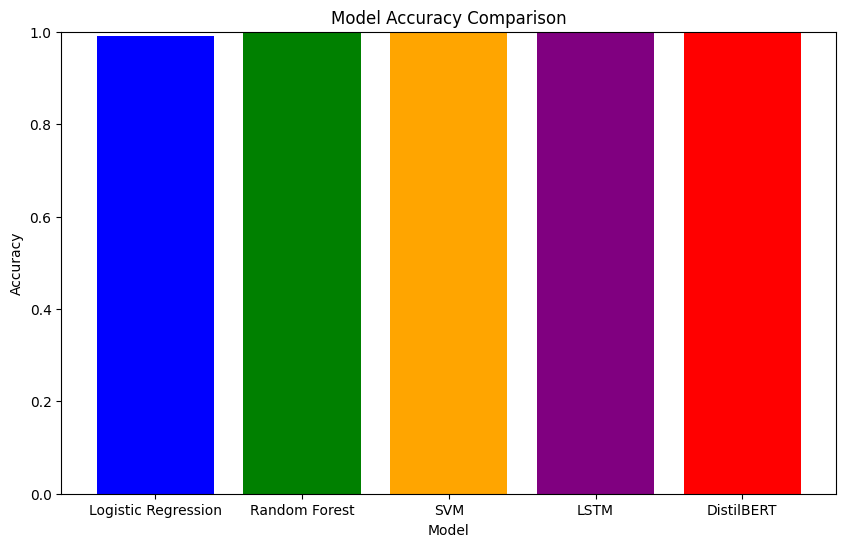

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_excel('dataset_v2.xlsx')

# Encode labels
le = LabelEncoder()
dataset['Category'] = le.fit_transform(dataset['Category'])

# Split into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    dataset['Text'], dataset['Category'], test_size=0.2, random_state=42
)

# TF-IDF Vectorizer for traditional ML models
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, train_labels)
lr_preds = lr_model.predict(X_test_tfidf)
lr_acc = accuracy_score(test_labels, lr_preds)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, train_labels)
rf_preds = rf_model.predict(X_test_tfidf)
rf_acc = accuracy_score(test_labels, rf_preds)

# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, train_labels)
svm_preds = svm_model.predict(X_test_tfidf)
svm_acc = accuracy_score(test_labels, svm_preds)

# LSTM
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

lstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, np.array(train_labels), epochs=5, batch_size=32, verbose=1)
lstm_preds = (lstm_model.predict(X_test_pad) > 0.5).astype("int32").flatten()
lstm_acc = accuracy_score(test_labels, lstm_preds)

# DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128)

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = Dataset(train_encodings, train_labels.tolist())
test_dataset = Dataset(test_encodings, test_labels.tolist())

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()
distilbert_results = trainer.predict(test_dataset)
distilbert_preds = np.argmax(distilbert_results.predictions, axis=1)
distilbert_acc = accuracy_score(test_labels, distilbert_preds)

# Compare Results
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "LSTM", "DistilBERT"],
    "Accuracy": [lr_acc, rf_acc, svm_acc, lstm_acc, distilbert_acc]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'orange', 'purple', 'red'])
plt.ylim(0.0, 1.0)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.005900,0.000172,1.000000,1.000000,1.000000,1.000000
2,0.000100,0.000090,1.000000,1.000000,1.000000,1.000000


Evaluation Results: {'eval_loss': 9.039307769853622e-05, 'eval_accuracy': 1.0, 'eval_f1': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_runtime': 35.2954, 'eval_samples_per_second': 16.999, 'eval_steps_per_second': 2.125, 'epoch': 2.0}
Confusion Matrix:
 [[416   0]
 [  0 184]]


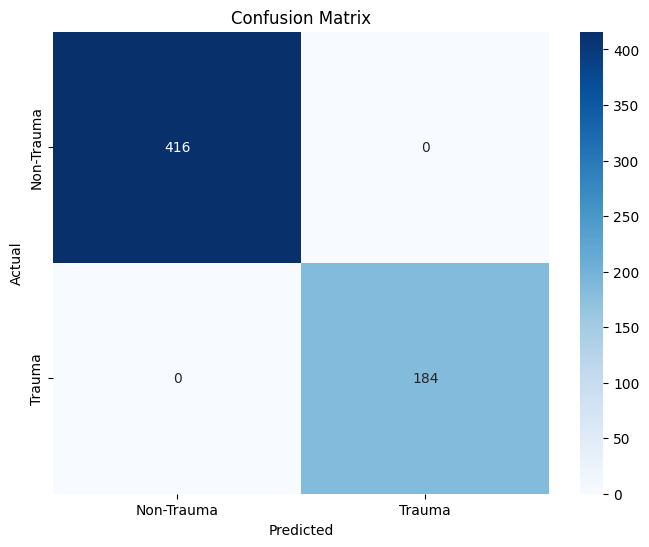

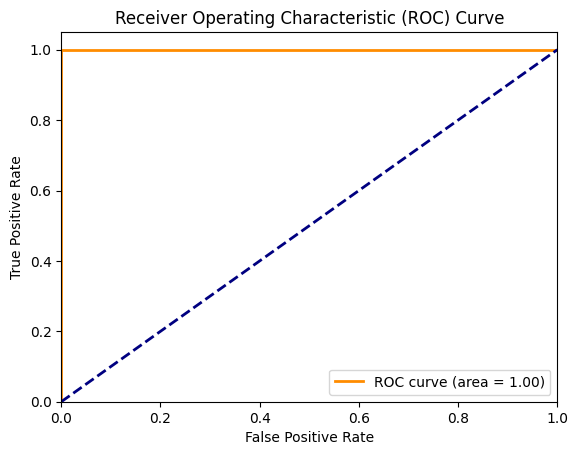

Training Accuracy: 1.0000
Test Accuracy: 1.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path accordingly)
dataset = pd.read_excel('dataset_v2.xlsx')

# Encode labels (1 for Trauma, 0 for Non-Trauma)
le = LabelEncoder()
dataset['Category'] = le.fit_transform(dataset['Category'])

# Split into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    dataset['Text'].tolist(),
    dataset['Category'].tolist(),
    test_size=0.2,
    random_state=42
)

# Tokenize texts using DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Convert data into PyTorch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = Dataset(train_encodings, train_labels)
test_dataset = Dataset(test_encodings, test_labels)

# Load pre-trained model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Define a compute_metrics function for evaluation
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    acc = accuracy_score(p.label_ids, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

# Trainer definition
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Get predictions from the model
predictions, labels, _ = trainer.predict(test_dataset)

# Convert predictions to class labels
preds = np.argmax(predictions, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, preds)
print("Confusion Matrix:\n", conf_matrix)

# Visualize Confusion Matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Trauma', 'Trauma'], yticklabels=['Non-Trauma', 'Trauma'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Compute ROC curve and AUC
probabilities = torch.nn.functional.softmax(torch.tensor(predictions), dim=1).numpy()
positive_probs = probabilities[:, 1]  # Probability of the positive class (Trauma)
fpr, tpr, _ = roc_curve(test_labels, positive_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy on training set
train_results = trainer.predict(train_dataset)
train_preds = np.argmax(train_results.predictions, axis=1)
train_acc = accuracy_score(train_labels, train_preds)
print(f"Training Accuracy: {train_acc:.4f}")

# Accuracy on test set
test_acc = accuracy_score(test_labels, preds)
print(f"Test Accuracy: {test_acc:.4f}")
